In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

dt_dengue = pd.read_csv('Dengue_2024_final.csv')
dt_dengue = dt_dengue.dropna()
dt_dengue = dt_dengue.drop('DATA', axis=1)
print(dt_dengue.isnull().sum())

ID NOTIF     0
SEXO         0
IDADE        0
REGIÃO       0
UF           0
ESTADO       0
MUNICÍPIO    0
dtype: int64


In [2]:

print('\nEstatísticas descritivas gerais',dt_dengue.describe())


#Distribuição por sexo.
sexo = dt_dengue['SEXO'].value_counts()
print('\nDistribuição por',sexo)


#Casos por região
casos_regiao = dt_dengue['REGIÃO'].value_counts()
print('\nCASOS POR',casos_regiao)


#Média de idade dos infectados.
mean_idade = dt_dengue['IDADE'].mean()
print('\nMÉDIA DE IDADE DOS INFECTADOS:',round(mean_idade,0))

#Idade média de homens e mulheres com dengue

homens = dt_dengue[dt_dengue['SEXO'] == 'M']
media_idade_homens = homens['IDADE'].mean()
print(f"Média de idade dos homens: {media_idade_homens:.2f}")


mulheres = dt_dengue[dt_dengue['SEXO'] == 'F']
media_idade_mulheres = mulheres['IDADE'].mean()
print(f"Média de idade das mulheres: {media_idade_mulheres:.2f}")


Estatísticas descritivas gerais             ID NOTIF          IDADE
count  236117.000000  236117.000000
mean   118634.995786      37.154504
std     68527.890264      19.777140
min         1.000000       1.000000
25%     59225.000000      22.000000
50%    118700.000000      35.000000
75%    177995.000000      51.000000
max    237172.000000     124.000000

Distribuição por SEXO
F    128779
M    106873
I       465
Name: count, dtype: int64

CASOS POR REGIÃO
SUDESTE                 135037
CENTRO _OESTE            48319
SUL                      38196
NORTE                     8918
NORDESTE                  5647
Name: count, dtype: int64

MÉDIA DE IDADE DOS INFECTADOS: 37.0
Média de idade dos homens: 35.63
Média de idade das mulheres: 38.43


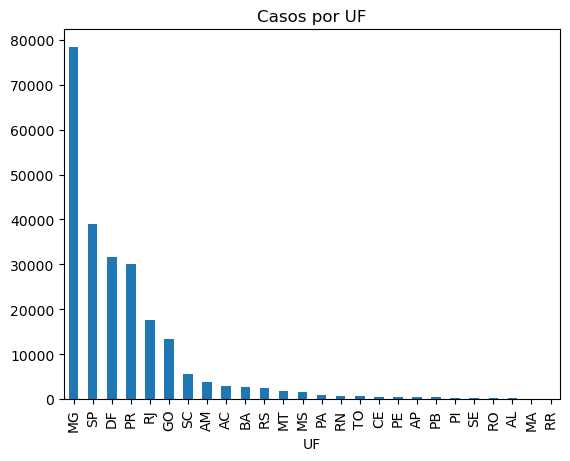

In [17]:
dt_dengue.groupby('UF').size().sort_values(ascending=False).plot(kind='bar', title='Casos por UF')
plt.show()

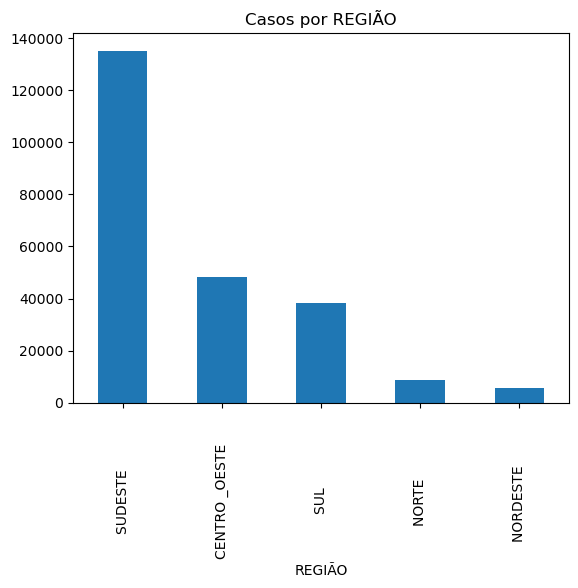

In [3]:
dt_dengue.groupby('REGIÃO').size().sort_values(ascending=False).plot(kind='bar', title='Casos por REGIÃO')
plt.show()

<Axes: title={'center': 'Casos por sexo'}, xlabel='SEXO'>

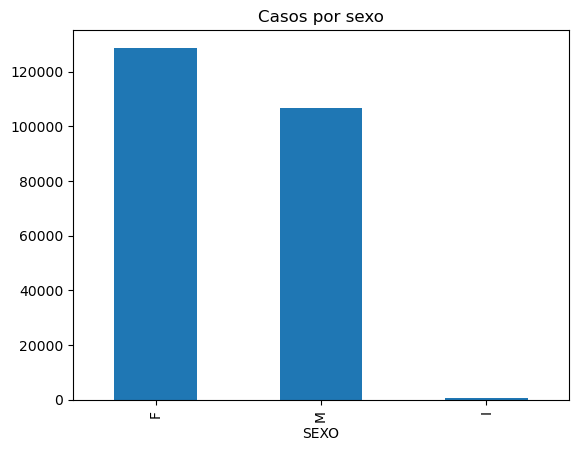

In [4]:
dt_dengue.groupby('SEXO').size().sort_values(ascending=False).plot(kind='bar', title='Casos por sexo')

In [6]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']

faixa_etaria_conta = dt_dengue['faixa_etaria'] = pd.cut(dt_dengue['IDADE'], bins=bins, labels=labels, right=False)
print(dt_dengue['faixa_etaria'].value_counts())


# Criar uma tabela de contingência (frequência de casos por sexo e faixa etária)
contingency_table = pd.crosstab(dt_dengue['faixa_etaria'], dt_dengue['SEXO'])

# Realizar o teste qui-quadrado
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Exibir os resultados
print(f'\nChi2: {chi2}, P-value: {p_value}')

faixa_etaria
21-30     47229
31-40     40162
41-50     37026
11-20     30186
51-60     28854
61-70     19990
0-10      17382
71-80     10737
81-90      3834
91-100      677
Name: count, dtype: int64

Chi2: 1615.869373765136, P-value: 0.0


C:\Users\dossa\AppData\Local\Temp\ipykernel_8036\2422801173.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt_dengue.groupby('faixa_etaria').size().sort_values(ascending=False).plot(kind='bar', title='Casos por Faixa Etária')


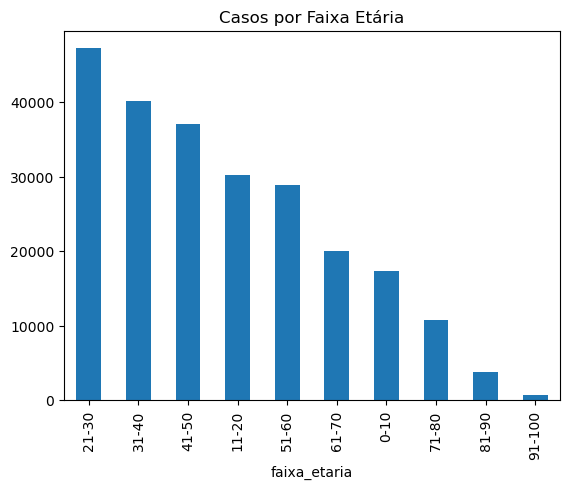

In [7]:
dt_dengue.groupby('faixa_etaria').size().sort_values(ascending=False).plot(kind='bar', title='Casos por Faixa Etária')
plt.show()

In [23]:
# teste t de student

from scipy.stats import ttest_ind

# Filtrando por sexo
homens = dt_dengue[dt_dengue['SEXO'] == 'M']['IDADE'].dropna()
mulheres = dt_dengue[dt_dengue['SEXO'] == 'F']['IDADE'].dropna()

# Teste t de Student
t_stat, p_value = ttest_ind(homens, mulheres, equal_var=False)  # equal_var=False se variâncias forem diferentes

print(f'Teste t: estatística={t_stat}, p-valor={p_value}')

Teste t: estatística=-34.22477568316503, p-valor=4.709115557557269e-256


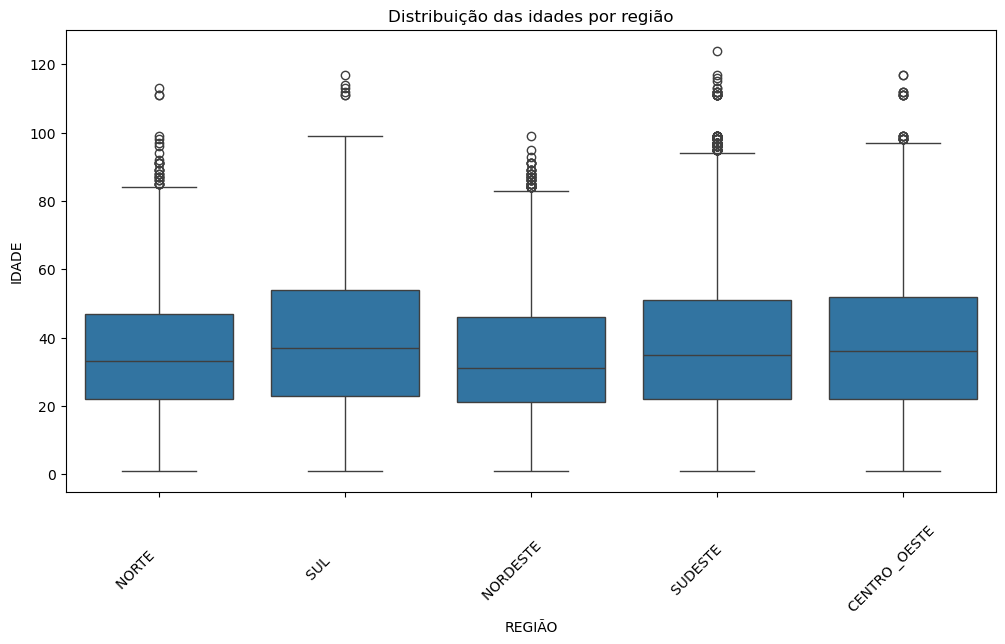

In [33]:
#idade x regiao

dt_dengue.groupby('REGIÃO')['IDADE'].mean().sort_values()
dt_dengue.groupby('UF')['IDADE'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.boxplot(x=dt_dengue['REGIÃO'], y=dt_dengue['IDADE'])
plt.xticks(rotation=45)
plt.title('Distribuição das idades por região')
plt.show()

In [34]:
#sexo x regiao

dt_dengue.groupby(['UF', 'SEXO'])['IDADE'].mean().unstack()

SEXO,F,I,M
UF,,,
AC,35.900259,37.750000,35.009286
AL,29.850000,NaN,26.649123
AM,35.821074,52.000000,35.216291
AP,31.520930,NaN,32.319444
BA,37.157233,48.714286,33.270341
CE,30.795918,NaN,31.201581
DF,39.565632,35.063492,36.109605
GO,38.927673,33.200000,36.434142
MA,33.111111,NaN,33.589744


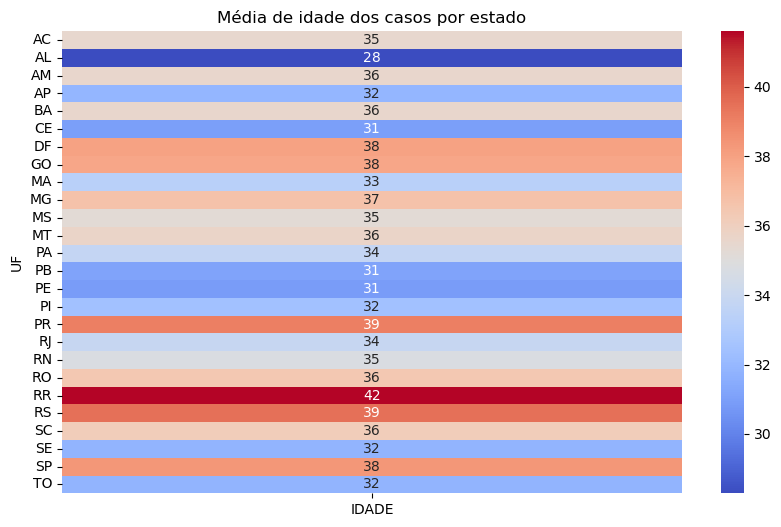

In [36]:
#estado x municipio

dt_dengue.groupby('MUNICÍPIO')['IDADE'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.heatmap(dt_dengue.pivot_table(index='UF', values='IDADE', aggfunc='mean'), cmap='coolwarm', annot=True)
plt.title('Média de idade dos casos por estado')
plt.show()

In [37]:

media_amostral = 37.22
desvio_padrao_amostral = 19.62
tamanho_amostra = 91587
conf_95 = 0.95

# Valor crítico Z para 95% de confiança
Z_95 = 1.96

# Calcular o erro padrão (EP)
EP = desvio_padrao_amostral / np.sqrt(tamanho_amostra)

# Calcular a margem de erro
margem_erro = Z_95 * EP

# Intervalo de confiança
IC_95_lower = media_amostral - margem_erro
IC_95_upper = media_amostral + margem_erro

print(f"Intervalo de confiança 95%: [{IC_95_lower:.2f}, {IC_95_upper:.2f}]")
print(f"Margem de erro: {margem_erro:.2f}")

Intervalo de confiança 95%: [37.09, 37.35]
Margem de erro: 0.13
